In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline


In [12]:
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df = pd.read_csv("./world-happiness-report/2015.csv")
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


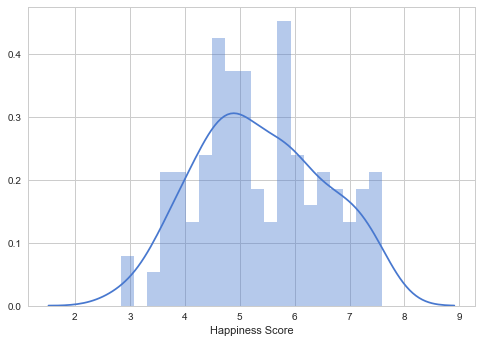

In [46]:
# Check out Correlations
sns.distplot(df['Happiness Score'], bins=20)

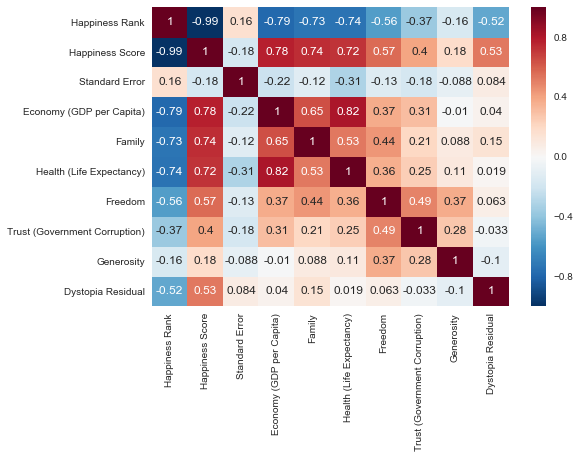

In [48]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

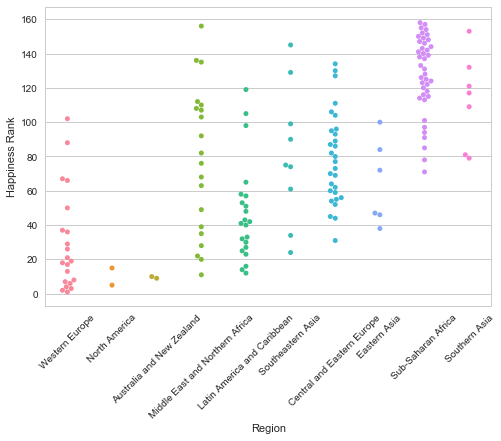

In [32]:
g = sns.swarmplot(x='Region', y='Happiness Rank', data=df)
plt.xticks(rotation=45)

In [33]:
# Investigate Global Happiness Ranking
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [35]:
# Setting up Linear Model to Predict Happiness
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -6.62640689e-04   1.00012756e+00   9.99809853e-01   9.99984279e-01
   9.99719976e-01   9.99885249e-01   9.99747287e-01   9.99955045e-01]


In [42]:
predictions = lm.predict(X_test)

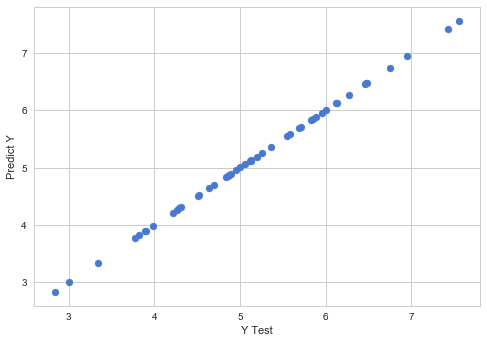

In [43]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predict Y')

In [44]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squred Error: ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squred Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  0.000268619101009
Mean Squred Error:  9.54822709567e-08
Root Mean Squred Error:  0.000309002056557


In [45]:
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955
